In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from scipy.stats import norm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


## Data Gathering

In [2]:
data = pd.read_csv("titanic.csv")

In [3]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
571,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
238,239,0,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.5000,NaN,S
399,400,1,2,"Trout, Mrs. William H (Jessie L)",female,28.0,0,0,240929,12.6500,NaN,S
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Preprocessing

In [5]:
pd.isnull(data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data = pd.read_csv('titanic.csv',usecols=["PassengerId", "Survived", "Pclass", "Sex","Name", "Age", "SibSp", "Parch", "Fare", "Embarked"])

# EDA

### Multivariate Analysis

Categorical == sex, embarked

Numerical == Pclass, Age, SibSp, Parch, Fare

Target == Survived

#### Categorical Vs Target

C:\Users\madha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Age'>

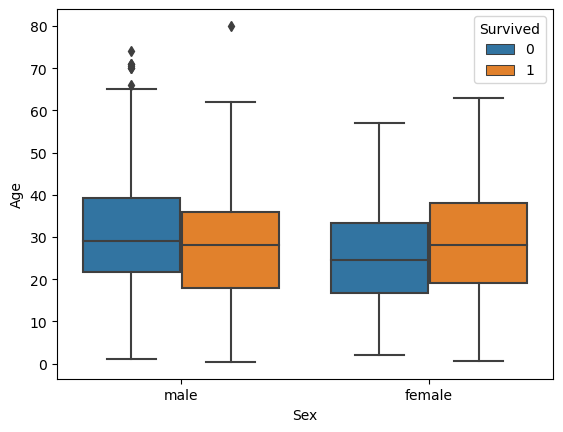

In [7]:
sns.boxplot(data["Sex"],data["Age"],hue=data["Survived"])

C:\Users\madha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='Age'>

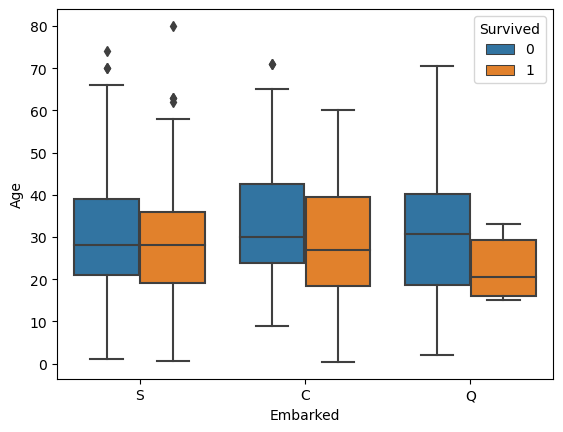

In [8]:
sns.boxplot(data["Embarked"],data["Age"],hue=data["Survived"])

#### Numerical Vs Target

In [9]:
data["Family"] = data["SibSp"] + data["Parch"]
data = data.drop(["SibSp", "Parch"], axis=1)

C:\Users\madha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Fare'>

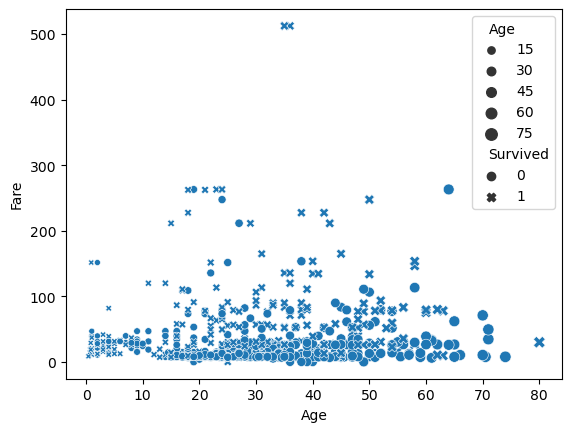

In [10]:
sns.scatterplot(data["Age"],data["Fare"],style=data["Survived"], size=data["Age"])

In [11]:
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,889,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,3,NaN
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,S,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,644,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,32.204208,NaN,0.904602
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,49.693429,NaN,1.613459
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,NaN,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,7.910400,NaN,0.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,14.454200,NaN,0.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,31.000000,NaN,1.000000


In [12]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
217,218,0,2,"Jacobsohn, Mr. Sidney Samuel",male,42.0,27.0000,S,1
445,446,1,1,"Dodge, Master. Washington",male,4.0,81.8583,S,2
467,468,0,1,"Smart, Mr. John Montgomery",male,56.0,26.5500,S,0
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0.0000,S,0
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,26.0000,S,1


In [13]:
pd.isnull(data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Fare             0
Embarked         2
Family           0
dtype: int64

### Data Preprocessing

In [14]:
data = data.fillna({"Embarked": "S"})

In [15]:
data["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
pd.isnull(data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Fare             0
Embarked         0
Family           0
dtype: int64

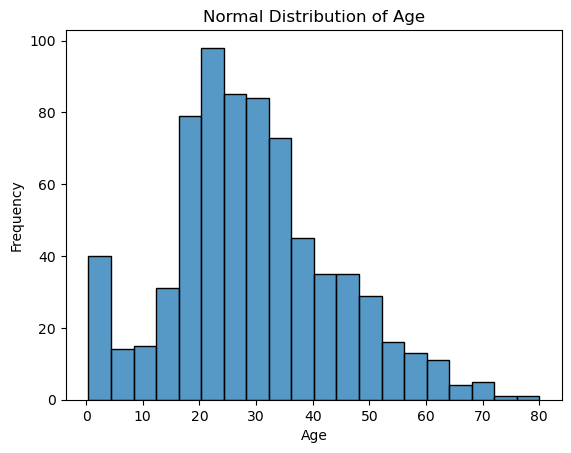

In [17]:
sns.histplot(data['Age'])
plt.title('Normal Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [18]:
for i in data:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [19]:
for i in data:
    data['Title'] = data['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    data['Title'] = data['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')


In [20]:
data.sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family,Title
225,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,9.3500,S,0,Mr
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,27.7208,C,0,Mr
780,781,1,3,"Ayoub, Miss. Banoura",female,13.0,7.2292,C,0,Miss
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,56.9292,C,0,Miss
442,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,7.7750,S,1,Mr
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,262.3750,C,4,Miss
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,46.9000,S,7,Mr
848,849,0,2,"Harper, Rev. John",male,28.0,33.0000,S,1,Rare
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,26.0000,S,0,Mr
108,109,0,3,"Rekic, Mr. Tido",male,38.0,7.8958,S,0,Mr


In [21]:
data["Title"].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       21
Royal       2
Name: Title, dtype: int64

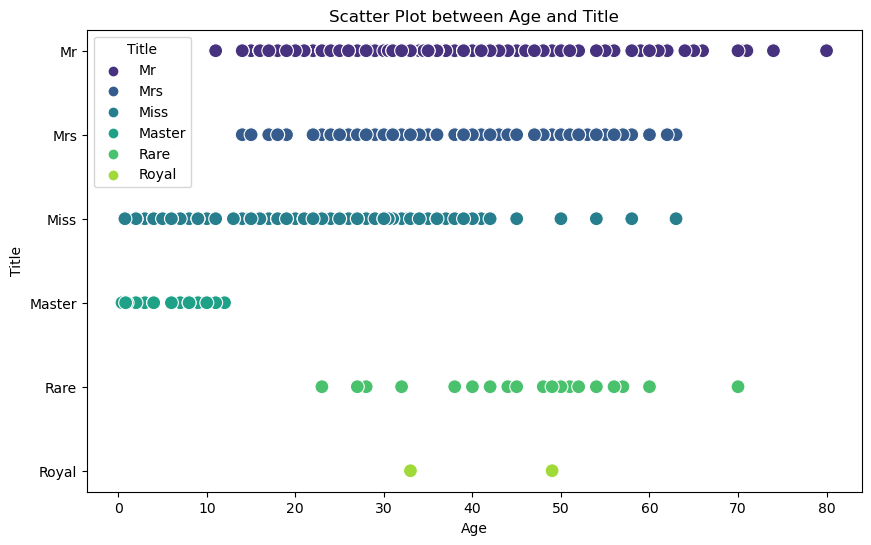

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Title', data=data, hue='Title', palette='viridis', s=100)
plt.xlabel('Age')
plt.ylabel('Title')
plt.title('Scatter Plot between Age and Title')
plt.show()

In [23]:
title_age_ranges = {
    'Mr': (25, 60),
    'Miss': (18, 30),
    'Mrs': (25, 60),
    'Master': (0, 18),
    'Rare': (25, 60),
    'Royal': (25, 60)
}

for title, age_range in title_age_ranges.items():
    mask = (data['Title'] == title) & (data['Age'].isnull())
    title_mean = data.loc[data['Title'] == title, 'Age'].mean()
    data.loc[mask, 'Age'] = data.loc[mask, 'Age'].fillna(title_mean)
    print(f"Mean age for {title}: {title_mean:.2f}")


Mean age for Mr: 32.37
Mean age for Miss: 21.85
Mean age for Mrs: 35.79
Mean age for Master: 4.57
Mean age for Rare: 46.00
Mean age for Royal: 41.00


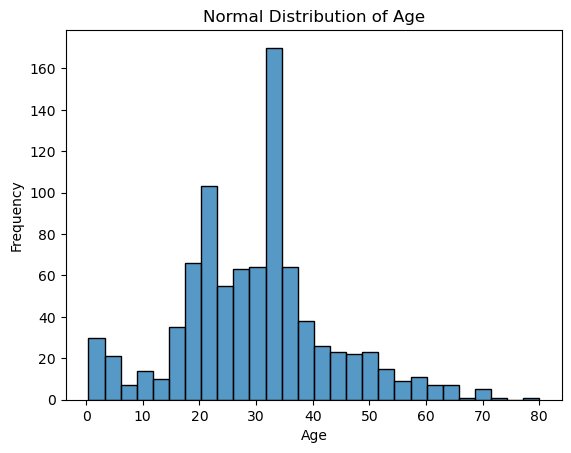

In [24]:
sns.histplot(data['Age'])
plt.title('Normal Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


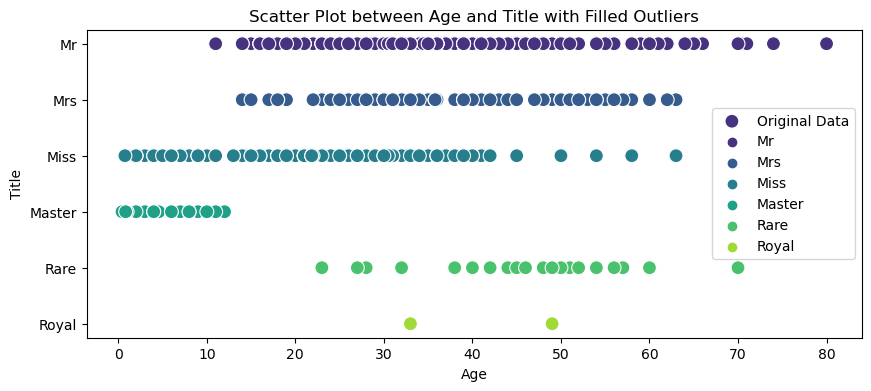

In [25]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Age', y='Title', data=data, hue='Title', palette='viridis', s=100, label='Original Data')
outliers_mask = data['Age'].isnull()
sns.scatterplot(x=data.loc[outliers_mask, 'Age'], y=data.loc[outliers_mask, 'Title'],
                marker='X', color='red', s=100, label='Filled Outliers')
plt.xlabel('Age')
plt.ylabel('Title')
plt.title('Scatter Plot between Age and Title with Filled Outliers')
plt.legend()
plt.show()


In [26]:
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family,Title
365,366,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30.000000,7.2500,S,0,Mr
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.000000,10.4625,S,1,Miss
792,793,0,3,"Sage, Miss. Stella Anna",female,21.845638,69.5500,S,10,Miss
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.000000,211.3375,S,1,Miss
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.000000,9.0000,S,0,Mr
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.000000,7.7750,S,0,Mr
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.000000,73.5000,S,2,Mr
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.000000,55.0000,S,1,Miss
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.000000,15.5000,Q,2,Mrs
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.000000,26.0000,S,1,Rare


In [27]:
pd.isnull(data).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
Family         0
Title          0
dtype: int64

### Model Training and Selection

In [28]:
data = data.drop("Name", axis=1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   Family       891 non-null    int64  
 8   Title        891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [30]:
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
data['Embarked'] = data['Embarked'].map(embarked_mapping)

title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4, 'Royal': 5}
data['Title'] = data['Title'].map(title_mapping)

sex_mapping = {'female': 0, 'male': 1}
data['Sex'] = data['Sex'].map(sex_mapping)


In [31]:
from sklearn.model_selection import train_test_split

predictors = data.drop(['Survived', 'PassengerId'], axis=1)
target = data["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

#### SVC

In [32]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

72.59


In [33]:
svc_score = np.mean(cross_val_score(svc,x_train,y_train,scoring='accuracy',cv=100))
print(svc_score)

0.6673809523809524


#### Naives Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

79.19


In [35]:
nb_score = np.mean(cross_val_score(gaussian,x_train,y_train,scoring='accuracy',cv=100))
print(nb_score)

0.8183333333333331


#### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.19


C:\Users\madha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
lgr_score = np.mean(cross_val_score(logreg,x_train,y_train,scoring='accuracy',cv=100))
print(lgr_score)

C:\Users\madha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\madha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\madha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\madha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8245238095238093


C:\Users\madha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

#### Linear SVC

In [38]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

78.17


C:\Users\madha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [39]:
linear_svc_score = np.mean(cross_val_score(linear_svc,x_train,y_train,scoring='accuracy',cv=100))
print(linear_svc_score)

C:\Users\madha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\madha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.7514285714285713


C:\Users\madha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Perceptron

In [40]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

76.14


In [41]:
perc_score = np.mean(cross_val_score(perceptron,x_train,y_train,scoring='accuracy',cv=100))
print(perc_score)

0.6559523809523808


#### Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

80.71


In [43]:
dtc_score = np.mean(cross_val_score(decisiontree,x_train,y_train,scoring='accuracy',cv=100))
print(dtc_score)

0.769047619047619


#### Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

83.25


In [45]:
rand_score = np.mean(cross_val_score(randomforest,x_train,y_train,scoring='accuracy',cv=100))
print(rand_score)

0.799047619047619


### KNN Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

74.62


C:\Users\madha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [47]:
knn_score = np.mean(cross_val_score(knn,x_train,y_train,scoring='accuracy',cv=100))
print(knn_score)

C:\Users\madha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\madha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.7066666666666666


C:\Users\madha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\madha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

#### SGD Classifer

In [48]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

78.17


In [49]:
sgd_score = np.mean(cross_val_score(sgd,x_train,y_train,scoring='accuracy',cv=100))
print(sgd_score)

0.6916666666666665


#### Gradient Boosting Classification

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

85.28


In [51]:
gbk_score = np.mean(cross_val_score(gbk,x_train,y_train,scoring='accuracy',cv=100))
print(gbk_score)

0.8249999999999998


In [52]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [svc_score, knn_score, lgr_score, 
              rand_score, nb_score, perc_score,linear_svc_score, dtc_score,
              sgd_score, gbk_score]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,0.825000
2,Logistic Regression,0.824524
4,Naive Bayes,0.818333
3,Random Forest,0.799048
7,Decision Tree,0.769048
6,Linear SVC,0.751429
1,KNN,0.706667
8,Stochastic Gradient Descent,0.691667
0,Support Vector Machines,0.667381
5,Perceptron,0.655952
